# ¿Cómo funciona la suspensión de un auto?
 

<div>
<img style="float: left; margin: 0px 0px 15px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg/414px-Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg" width="150px" height="50px" />

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/df/Radaufhängung_Renault.JPG" width="150px" height="100px" />

</div>
 
> Una primer aproximación al modelo de la suspensión de un automovil es considerar el *oscilador armónico amortiguado*. 

<img style="float: center; margin: 0px 0px 15px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/4/45/Mass_spring_damper.svg" width="300px" height="100px" />

Referencia: 
- https://es.wikipedia.org/wiki/Oscilador_arm%C3%B3nico#Oscilador_arm.C3.B3nico_amortiguado

Un **modelo** que describe el comportamiento del sistema mecánico anterior es

\begin{equation}
m\frac{d^2 x}{dt^2}=-c\frac{dx}{dt}-kx
\end{equation}

donde $c$ es la constante de amortiguamiento y $k$ es la constante de elasticidad. <font color=red> Revisar modelado </font>

Documentación de los paquetes que utilizaremos hoy.
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
- https://docs.scipy.org/doc/scipy/reference/index.html

___
En `python` existe una función llamada <font color = blue>_odeint_</font> del paquete <font color = blue>_integrate_</font> de la libreria <font color = blue>_scipy_</font>, que permite integrar sistemas vectoriales de primer orden, del tipo

\begin{equation}
\frac{d\boldsymbol{y}}{dt} = \boldsymbol{f}(t,\boldsymbol{y}); \qquad \text{ con }\quad \boldsymbol{y}\in\mathbb{R}^n,\quad \boldsymbol{f}:\mathbb{R}_{+}\times\mathbb{R}^n\to\mathbb{R}^n
\end{equation}

con condiciones iniciales $\boldsymbol{y}(0) = \boldsymbol{y}_{0}$. Notar que <font color=red> $\boldsymbol{y}$ representa un vector de $n$ componentes</font>.

Ahora, si nos fijamos bien, el modelo del *oscilador armónico amortiguado* que obtuvimos es una ecuación diferencial ordinaria (EDO) de segundo orden. No hay problema. La podemos convertir en un sistema de ecuaciones de primer orden de la siguiente manera:

1. Seleccionamos el vector $\boldsymbol{y}=\left[y_1\quad y_2\right]^T$, con $y_1=x$ y $y_2=\frac{dx}{dt}$.
2. Notamos que $\frac{dy_1}{dt}=\frac{dx}{dt}=y_2$ y $\frac{dy_2}{dt}=\frac{d^2x}{dt^2}=-\frac{c}{m}\frac{dx}{dt}-\frac{k}{m}x=-\frac{c}{m}y_2-\frac{k}{m}y_1$.
3. Entonces, el modelo de segundo orden lo podemos representar como el siguiente sistema vectorial de primer orden:

\begin{equation}
\frac{d\boldsymbol{y}}{dt}=\left[\begin{array}{c}\frac{dy_1}{dt} \\ \frac{dy_2}{dt}\end{array}\right]=\left[\begin{array}{c}y_2 \\ -\frac{k}{m}y_1-\frac{c}{m}y_2\end{array}\right]=\left[\begin{array}{cc}0 & 1 \\-\frac{k}{m} & -\frac{c}{m}\end{array}\right]\boldsymbol{y}.
\end{equation}

In [1]:
# Primero importamos todas las librerias, paquetes y/o funciones que vamos a utlizar
import matplotlib.pyplot as plt         # ¿Para qué sirve?
import numpy as np                      # ¿Para qué sirve?
from scipy.integrate import odeint      # Función para integrar EDO vectoriales de primer orden
%matplotlib inline                      

In [44]:
# Definimos los parámetros
k = 3.0                                         # Constante del muelle
m = 1.0                                         # Masa
B = .5                                          # Constante de amortiguación

# Función f(t,y) que vamos a integrar
def armonico(y, t, k, m, B):
    #y1, y2 = y
    y1 = y[0]
    y2 = y[1]
    return [y2, -k * y1 / m - B / m * y2]

y0 = [0.6, 0.4]                                 # Vector de posición inicial y velocidad inicial
                                                # condiciones iniciales y1(0)=0.6 [m] y2(0)=0.4 [m/s]

# Especificamos los puntos de tiempo donde queremos la solución
tt = np.linspace(0, 50, 500)                    # Dominio temporal de 0 a 15 (por defecto 50 puntos)
#tt = np.arange(0, 20, .01)                       # Dominio temporal de 0 a 20 con paso de 0.01

yy = odeint(armonico, y0, tt, args=(k, m, B))
#El sistema se resuelve  con 
#odeint(funcion_sistema, condiciones_iniciales, dominio_tiempo)

¿Cómo entrega odeint las soluciones?

In [45]:
#np.shape(yy)
yy.shape

(500, 2)

In [46]:
yy

array([[  6.00000000e-01,   4.00000000e-01],
       [  6.30031898e-01,   1.99606293e-01],
       [  6.40133413e-01,   3.15559636e-03],
       [  6.30982431e-01,  -1.83787820e-01],
       [  6.03787939e-01,  -3.56210274e-01],
       [  5.60228546e-01,  -5.09768540e-01],
       [  5.02380433e-01,  -6.40884469e-01],
       [  4.32637049e-01,  -7.46812426e-01],
       [  3.53623475e-01,  -8.25679066e-01],
       [  2.68108168e-01,  -8.76495608e-01],
       [  1.78914830e-01,  -8.99143584e-01],
       [  8.88369710e-02,  -8.94335786e-01],
       [  5.57511750e-04,  -8.63554756e-01],
       [ -8.34244342e-02,  -8.08971721e-01],
       [ -1.60857808e-01,  -7.33349325e-01],
       [ -2.29793455e-01,  -6.39931761e-01],
       [ -2.88626497e-01,  -5.32326152e-01],
       [ -3.36126519e-01,  -4.14379165e-01],
       [ -3.71455347e-01,  -2.90052539e-01],
       [ -3.94172441e-01,  -1.63301364e-01],
       [ -4.04228369e-01,  -3.79585116e-02],
       [ -4.01947144e-01,   8.23717119e-02],
       [ -

- $yy$ es una matriz de 2000 filas y 2 columnas.
- La primer columna de $yy$ corresponde a $y_1$.
- La segunda columna de $yy$ corresponde a $y_2$.

¿Cómo extraemos los resultados $y_1$ y $y_2$ independientemente?

In [47]:
y1 = yy[:,0]
y2 = yy[:,1]

In [48]:
# Comandos para hacer los números de los ejes más grandes
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

### Para hacer participativamente...
- Graficar en una misma ventana $y_1$ vs. $t$ y $y_2$ vs. $t$... ¿qué pueden observar?

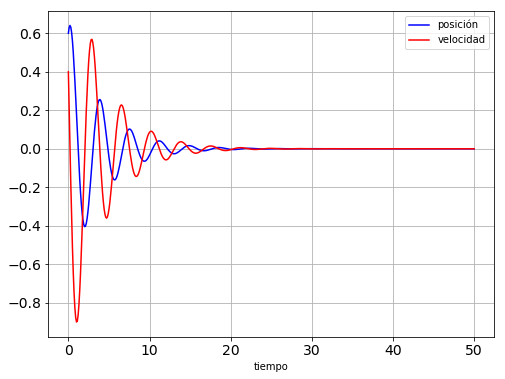

In [49]:
plt.figure(figsize=(8,6))
plt.plot(tt, y1, 'b', label='posición')
plt.plot(tt, y2, 'r', label='velocidad')
plt.legend(loc='best')
plt.xlabel('tiempo')
plt.grid()
plt.show()

- Graficar $y_2/\omega_0$ vs. $y_1$... ¿cómo se complementan estos gráficos? ¿conclusiones?

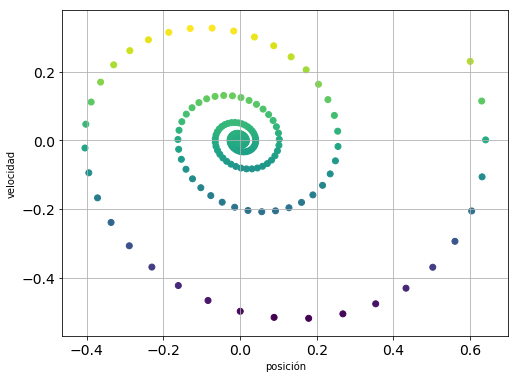

In [50]:
w0 = np.sqrt(k/m)
plt.figure(figsize=(8,6))
plt.scatter(y1, y2/w0, c=y2, cmap='viridis')
plt.xlabel('posición')
plt.ylabel('velocidad')
plt.grid()
plt.show()

## Dependiendo de los parámetros, 3 tipos de soluciones

Teníamos
\begin{equation}
m\frac{d^2 x}{dt^2} + c\frac{dx}{dt} + kx = 0
\end{equation}

si recordamos que $\omega_0 ^2 = \frac{k}{m}$ y definimos $\frac{c}{m}\equiv 2\Gamma$, tendremos

\begin{equation}
\frac{d^2 x}{dt^2} + 2\Gamma \frac{dx}{dt}+ \omega_0^2 x = 0
\end{equation}

<font color=blue>El comportamiento viene determinado por las raices de la ecuación característica. Ver en el tablero...</font>

### Subamortiguado

Si $\omega_0^2 > \Gamma^2$ se tiene movimiento oscilatorio *subamortiguado*. 

In [16]:
omega0 = k/m
Gamma = B/(2*m)

In [17]:
omega0**2, Gamma**2

(9.0, 0.0625)

In [18]:
omega0**2 > Gamma**2

True

Entonces, el primer caso que ya habíamos presentado corresponde a movimiento amortiguado. 

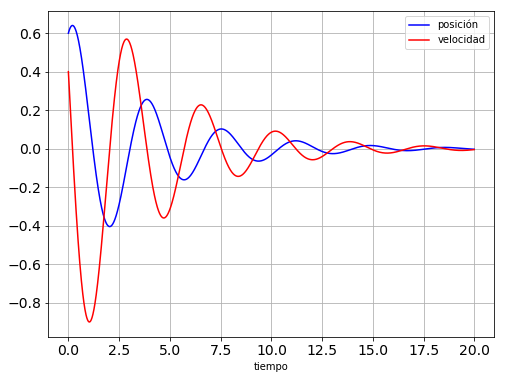

In [21]:
plt.figure(figsize=(8,6))
plt.plot(tt, y1, 'b', label='posición')
plt.plot(tt, y2, 'r', label='velocidad')
plt.legend(loc='best')
plt.xlabel('tiempo')
plt.grid()
plt.show()

### Sobreamortiguado

Si $\omega_0^2 < \Gamma^2$ se tiene movimiento oscilatorio *sobreamortiguado*. 

In [25]:
k = .1 # Constante del muelle
m = 1.0   # Masa
B = 1 # Constante de amortiguación

Simular y graficar...

In [26]:
omega0 = np.sqrt(k/m)
Gamma = B/(2*m)

In [27]:
omega0**2, Gamma**2

(0.10000000000000001, 0.25)

In [28]:
omega0**2<Gamma**2

True

In [33]:
tt = np.linspace(0,50,500)
yy = odeint(armonico, y0, tt, args=(k, m, B))
y1s = yy[:,0]
y2s = yy[:,1]

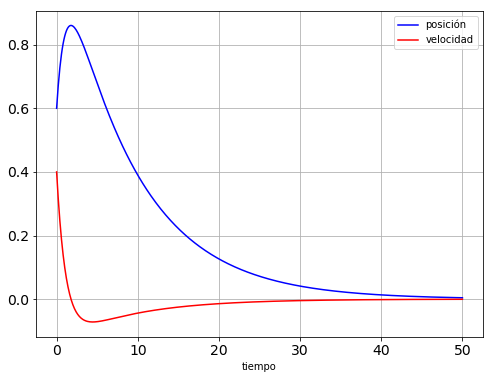

In [34]:
plt.figure(figsize=(8,6))
plt.plot(tt, y1s, 'b', label='posición')
plt.plot(tt, y2s, 'r', label='velocidad')
plt.legend(loc='best')
plt.xlabel('tiempo')
plt.grid()
plt.show()

### Amortiguamiento crítico

Si $\omega_0^2 = \Gamma^2$ se tiene movimiento *críticamente amortiguado*. 

In [38]:
k = .0625 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

Simular y graficar...

In [39]:
omega0 = np.sqrt(k/m)
Gamma = B/(2*m)

In [40]:
omega0**2, Gamma**2

(0.0625, 0.0625)

In [41]:
omega0**2 == Gamma**2

True

In [42]:
tt = np.linspace(0,50,500)
yy = odeint(armonico, y0, tt, args=(k, m, B))
y1c = yy[:,0]
y2c = yy[:,1]

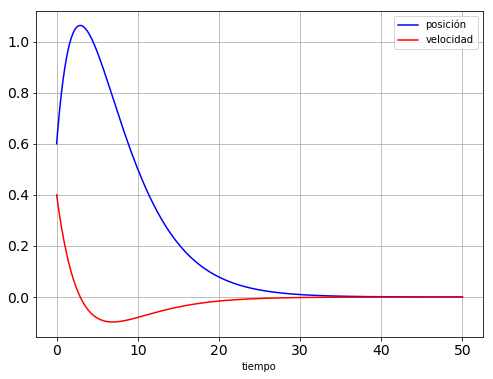

In [43]:
plt.figure(figsize=(8,6))
plt.plot(tt, y1c, 'b', label='posición')
plt.plot(tt, y2c, 'r', label='velocidad')
plt.legend(loc='best')
plt.xlabel('tiempo')
plt.grid()
plt.show()

En resumen, se tiene entonces: 

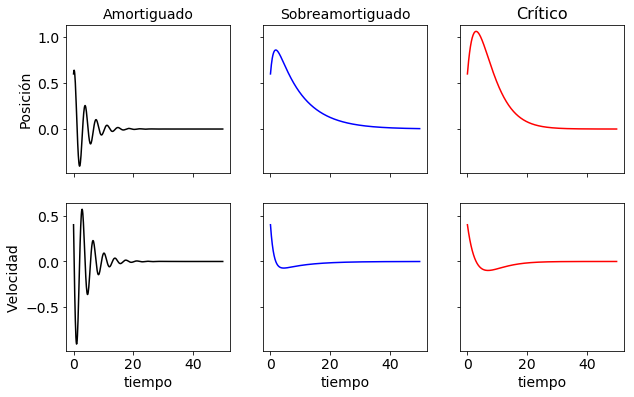

In [52]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col',
                                                       sharey='row',figsize =(10,6))
ax1.plot(tt, y1, c = 'k') 
ax1.set_title('Amortiguado', fontsize = 14)
ax1.set_ylabel('Posición', fontsize = 14)
ax2.plot(tt, y1s, c = 'b') 
ax2.set_title('Sobreamortiguado', fontsize = 14)
ax3.plot(tt, y1c, c = 'r') 
ax3.set_title('Crítico', fontsize = 16)
ax4.plot(tt, y2, c = 'k')
ax4.set_ylabel('Velocidad', fontsize = 14)
ax4.set_xlabel('tiempo', fontsize = 14)
ax5.plot(tt, y2s, c = 'b')
ax5.set_xlabel('tiempo', fontsize = 14)
ax6.plot(tt, y2c, c = 'r')
ax6.set_xlabel('tiempo', fontsize = 14)
plt.show()

> **Tarea**. ¿Cómo se ve el espacio fase para los diferentes casos así como para diferentes condiciones iniciales?

> En un gráfico como el anterior, realizar gráficas del plano fase para los distintos movimientos y para cuatro conjuntos de condiciones iniciales distintas
- y0 = [1, 1]
- y0 = [1, -1]
- y0 = [-1, 1]
- y0 = [-1, -1]

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso. Modified by Esteban Jiménez Rodríguez.
</footer>